**Predictive Regression Model for Sales using Advertising.csv dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
from google.colab import files
uploaded=files.upload()

Saving Advertising.csv to Advertising.csv


Mean Squared Error: 3.79679723671522


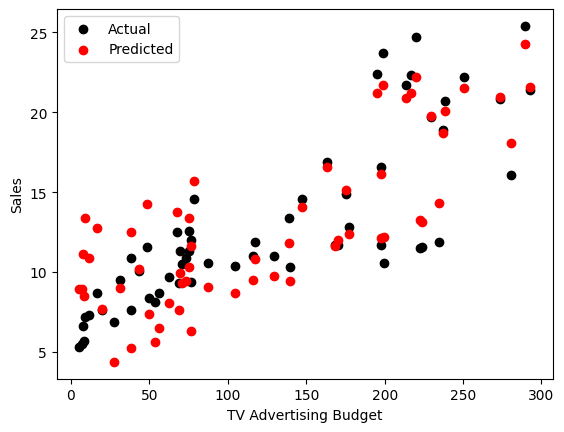

In [ ]:
# Load the dataset
df_advertising = pd.read_csv("Advertising.csv")

# Split the data into features (X) and target variable (y)
X = df_advertising[['TV', 'radio', 'newspaper']]
y = df_advertising['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the results
plt.scatter(X_test['TV'], y_test, color='black', label='Actual')
plt.scatter(X_test['TV'], y_pred, color='red', label='Predicted')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

**Logistic Regression and SVM for Default Prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from google.colab import files
uploaded=files.upload()

Saving Credit-Modified.csv to Credit-Modified (1).csv
Saving Credit.csv to Credit (1).csv


Confusion Matrix (Logistic Regression):
 [[100   1]
 [  1  18]]

Confusion Matrix (SVM):
 [[101   0]
 [  3  16]]


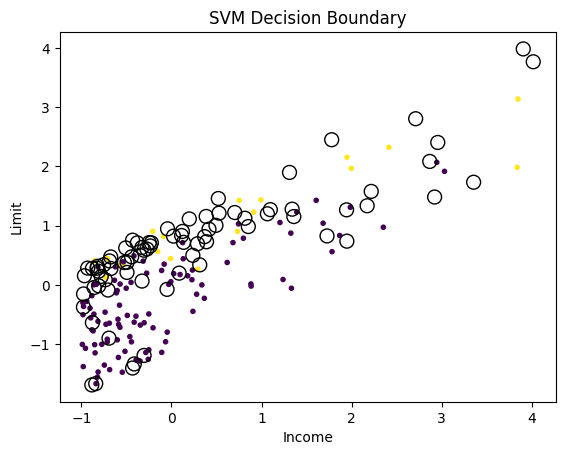

In [ ]:
# Load the datasets
df_credit = pd.read_csv("Credit.csv")
df_credit_modified = pd.read_csv("Credit-Modified.csv")

# Select features and target variable
X_credit = df_credit.drop('Defaultee', axis=1)
y_credit = df_credit['Defaultee']

X_credit_mod = df_credit_modified.drop('Defaultee', axis=1)
y_credit_mod = df_credit_modified['Defaultee']

# Standardize the features
scaler = StandardScaler()

# Extract the common features for scaling
common_features = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']

# Apply the same preprocessing steps to the original data
X_credit_scaled = pd.DataFrame(scaler.fit_transform(X_credit[common_features]), columns=common_features)

# Apply the same preprocessing steps to the modified data
X_credit_mod_scaled = pd.DataFrame(scaler.transform(X_credit_mod[common_features]), columns=common_features)

# Split the preprocessed data into training and testing sets
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit_scaled, y_credit, test_size=0.3, random_state=42)
X_train_credit_mod, X_test_credit_mod, y_train_credit_mod, y_test_credit_mod = train_test_split(X_credit_mod_scaled, y_credit_mod, test_size=0.3, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_credit, y_train_credit)
y_pred_logistic = logistic_model.predict(X_test_credit_mod)  # Use X_test_credit_mod for evaluation

# SVM
svm_model = SVC()
svm_model.fit(X_train_credit, y_train_credit)
y_pred_svm = svm_model.predict(X_test_credit_mod)  # Use X_test_credit_mod for evaluation

# Evaluate the models on the modified data
accuracy_logistic = accuracy_score(y_test_credit_mod, y_pred_logistic)
accuracy_svm = accuracy_score(y_test_credit_mod, y_pred_svm)

# Confusion Matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test_credit_mod, y_pred_logistic)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_logistic)

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test_credit_mod, y_pred_svm)
print("\nConfusion Matrix (SVM):\n", conf_matrix_svm)

# Visualize the data distribution and separation line for SVM
plt.scatter(X_test_credit_mod['Income'], X_test_credit_mod['Limit'], c=y_test_credit_mod, cmap='viridis', marker='.')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('Income')
plt.ylabel('Limit')
plt.title('SVM Decision Boundary')
plt.show()


**Anova Test for Feature Significance**


In [ ]:
from sklearn.feature_selection import f_classif

# Perform Anova test for feature significance
f_scores, p_values = f_classif(X_credit_scaled, y_credit)

# Create a table to assess the significance
feature_significance_table = pd.DataFrame({'Feature': X_credit.columns, 'F-Score': f_scores, 'P-Value': p_values})
print(feature_significance_table)

       Feature     F-Score       P-Value
0   Unnamed: 0    0.035254  8.511595e-01
1       Income   78.609099  2.571368e-17
2        Limit  252.248530  2.396566e-44
3       Rating  259.693257  2.465673e-45
4        Cards    4.025334  4.549784e-02
5          Age    0.579367  4.470113e-01
6    Education    0.036607  8.483654e-01
7      Balance  494.736145  8.163230e-72
8            0    0.004563  9.461796e-01
9            1   33.242414  1.633990e-08
10           2    0.313386  5.759248e-01
11           3    0.036340  8.489131e-01
12           4    0.045334  8.314999e-01


**Significance of Derived Model Parameters**

In [ ]:
import statsmodels.api as sm
# Check for multicollinearity in the logistic regression model
X_train_credit_sm = sm.add_constant(X_train_credit)
X_test_credit_sm = sm.add_constant(X_test_credit)

# Fit logistic regression model using statsmodels
logistic_model_sm = sm.Logit(y_train_credit, X_train_credit_sm)
result = logistic_model_sm.fit()

# Print model summary
print(result.summary())


VIF Results:
     Variable         VIF
0      Limit  235.495109
1     Rating  230.748876
2      Cards    1.533106
3        Age    1.042616
4  Education    1.020877
5    Balance    4.766216
         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Defaultee   No. Observations:                  280
Model:                          Logit   Df Residuals:                      275
Method:                           MLE   Df Model:                            4
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                   1.000
Time:                        05:44:48   Log-Likelihood:            -2.9750e-05
converged:                      False   LL-Null:                       -135.85
Covariance Type:            nonrobust   LLR p-value:                 1.369e-57
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
